In [2]:
import numpy as np
from package.Graphs import Graphs
import matplotlib.pyplot as plt

In [3]:
# state0 = np.load('../Data/neel_readout/qutrit/051024/Q1_state0_1µs.npy')
# state1 = np.load('../Data/neel_readout/qutrit/051024/Q1_state1_1µs.npy')
# state2 = np.load('../Data/neel_readout/qutrit/051024/Q1_state2_1µs.npy')

state0 = np.load('/pscratch/sd/n/nrvora/Data/Quantum/longterm/state0.npy')
state1 = np.load('/pscratch/sd/n/nrvora/Data/Quantum/longterm/state1.npy')
state2 = np.load('/pscratch/sd/n/nrvora/Data/Quantum/longterm/state2.npy')

state0.shape

(12000, 8192)

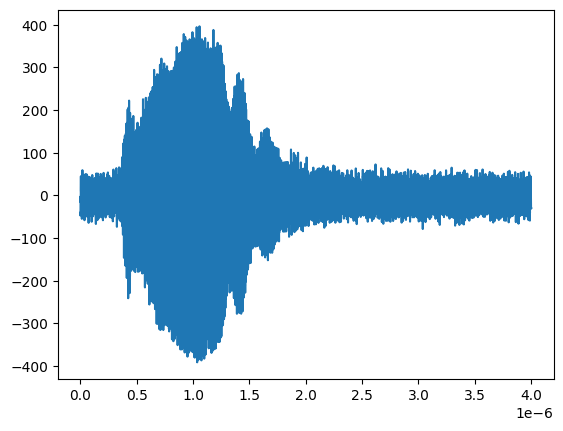

In [4]:
# Plot
t=np.arange(0,4*1e-6,0.5*1e-9)
plt.plot(t,np.mean(state0[:,10:8010],axis=0))

In [5]:
frequencies=6558994494.03787 #6658371267.87147 
samples_per_clk=16
st =  20312 #20272 #Vary from circuit to circuit
CSTROBE_DELAY=2
QCLK_DELAY=4
PHASEIN_DELAY=1
phase=3.7 #3.4
CLK_CYCLE=2
PHASE_RST_DELAY=9
start_time = samples_per_clk*st + samples_per_clk*(CSTROBE_DELAY + QCLK_DELAY + PHASEIN_DELAY)
phases = phase + 2*np.pi*(CLK_CYCLE/samples_per_clk)\
        *1.e-9*(start_time - samples_per_clk*(PHASE_RST_DELAY))*frequencies
amplitude=1 #1/1.64676025812107
dlo=Graphs.getComplexSignal(frequencies,amplitude,st=0,end=4096,step=0.5,phase=phases,t0=0) #(8192)
dlo_int=np.ceil(dlo.real*((2**15)-1)) + 1j*(np.ceil(dlo.imag*((2**15)-1)))
# print(dlo_int)

#Mixing og signal and convert the into complex signals
state0=((state0+0j)*dlo_int) #(1000,8192)
state1=((state1+0j)*dlo_int)
state2=((state2+0j)*dlo_int)

In [13]:
np.save('/pscratch/sd/n/nrvora/Data/Quantum/longterm/dlo_state0.npy',state0)
np.save('/pscratch/sd/n/nrvora/Data/Quantum/longterm/dlo_state1.npy',state1)
np.save('/pscratch/sd/n/nrvora/Data/Quantum/longterm/dlo_state2.npy',state2)

## MultiRead

In [ ]:


state0 = np.array([state0[:,700:2700], state0[:, 3500:5500], state0[:, 5500:7500]])
state1 = np.array([state1[:,700:2700], state1[:, 3620:5620], state1[:, 5620:7620]])
state2 = np.array([state2[:,700:2700], state2[:, 3740:5740], state2[:, 5740:7740]])


state0=np.sum(state0,axis=-1)
state1=np.sum(state1,axis=-1)
state2=np.sum(state2,axis=-1)



In [ ]:
state0.shape

In [ ]:
plt.scatter(state0[0,:].real,state0[0,:].imag, alpha=0.2)
plt.scatter(state1[0,:].real,state1[0,:].imag, alpha=0.2)
plt.scatter(state2[0,:].real,state2[0,:].imag, alpha=0.2)
plt.show()

In [ ]:
plt.scatter(state0[1,:].real,state0[1,:].imag, alpha=0.2)
plt.scatter(state1[1,:].real,state1[1,:].imag, alpha=0.2)
plt.scatter(state2[1,:].real,state2[1,:].imag, alpha=0.2)
plt.show()

In [ ]:
mean0 = state0[0,].mean()
mean1 = state1[1,].mean()+ [3e9 + 1j*2e9]
mean2 = state2[1,].mean()+ [1e9 + 1j*3e9]
count,count1=0,0
for i in state2[1]:
    if np.linalg.norm(mean2-i) < np.linalg.norm(mean0-i):
        count1+=1
    count+=1
print(count,count1)

In [ ]:
plt.scatter(state0[2,:].real,state0[2,:].imag, alpha=0.2)
plt.scatter(state1[2,:].real,state1[2,:].imag, alpha=0.2)
plt.scatter(state2[2,:].real,state2[2,:].imag, alpha=0.2)

## Single Read

### Accum

In [6]:
state0 = np.sum(state0[:,700:2700],axis=-1)
state1 = np.sum(state1[:,700:2700],axis=-1)
state2 = np.sum(state2[:,700:2700],axis=-1)

In [7]:
np.save('/pscratch/sd/n/nrvora/Data/Quantum/Data/ML/072924/state0.npy',np.vstack((state0.real,state0.imag)).T)
np.save('/pscratch/sd/n/nrvora/Data/Quantum/Data/ML/072924/state1.npy',np.vstack((state1.real,state1.imag)).T)
np.save('/pscratch/sd/n/nrvora/Data/Quantum/Data/ML/072924/state2.npy',np.vstack((state2.real,state2.imag)).T)

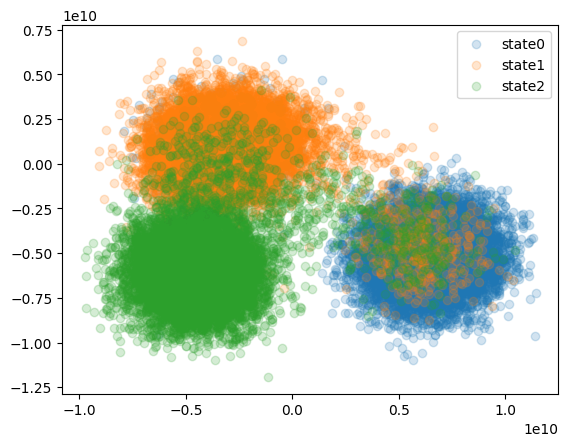

In [9]:
plt.scatter(state0.real,state0.imag, alpha=0.2, label='state0')
plt.scatter(state1.real,state1.imag, alpha=0.2, label='state1')
plt.scatter(state2.real,state2.imag, alpha=0.2, label='state2')
plt.legend()

In [ ]:
state0_mean = state0.mean()
state1_mean = state1.mean()
state2_mean = state2.mean()
count,count1=0,0
state1_0Idx = np.array([k for k,i in enumerate(state1) if np.linalg.norm(state1_mean - i) > np.linalg.norm(state0_mean - i)])
state2_1Idx = np.array([k for k,i in enumerate(state2) if np.linalg.norm(state2_mean - i) > np.linalg.norm(state1_mean - i)])
state2_0Idx = np.array([k for k,i in enumerate(state2) if np.linalg.norm(state2_mean - i) > np.linalg.norm(state0_mean - i)])
state2_1Idx=np.setdiff1d(state2_1Idx, state2_0Idx)


### Pathsig

In [ ]:
sig0,sig1,sig2=[],[],[]
for i in range(1000):
    data = np.stack((state0[i,700:2700].real , state0[i,700:2700].imag),axis=1)
    cum_data = np.cumsum(data, axis=0)
    sig0.append(Graphs.sig(np.diff(cum_data, axis=0),  4))

    data = np.stack((state1[i,700:2700].real , state1[i,700:2700].imag),axis=1)
    cum_data = np.cumsum(data, axis=0)
    sig1.append(Graphs.sig(np.diff(cum_data, axis=0),  4))

    data = np.stack((state2[i,700:2700].real , state2[i,700:2700].imag),axis=1)
    cum_data = np.cumsum(data, axis=0)
    sig2.append(Graphs.sig(np.diff(cum_data, axis=0),  4))

sig0=np.array(sig0)
sig1=np.array(sig1)
sig2=np.array(sig2)


In [ ]:
print(sig0.shape, sig1.shape , sig2.shape)

### Seperation

In [ ]:
raw0 = sig0
raw1_0 = sig1[state1_0Idx]
mask = np.ones(sig1.shape[0], dtype=bool)
mask[state1_0Idx] = False
raw1 = sig1[mask]

raw2_1 = sig2[state2_1Idx]
raw2_0 = sig2[state2_0Idx]
mask = np.ones(sig2.shape[0], dtype=bool)
mask[state2_1Idx] = False
mask[state2_0Idx]=False
raw2 = sig2[mask]

print(raw0.shape)
print(raw1.shape,raw1_0.shape)
print(raw2.shape,raw2_1.shape,raw2_0.shape)


In [ ]:
np.save('../Data/ML/qutrit/raw0.npy', raw0)
np.save('../Data/ML/qutrit/raw1.npy', raw1)
np.save('../Data/ML/qutrit/raw2.npy', raw2)
np.save('../Data/ML/qutrit/raw1_0.npy', raw1_0)
np.save('../Data/ML/qutrit/raw2_1.npy', raw2_1)
np.save('../Data/ML/qutrit/raw2_0.npy', raw2_0)